Real Estate Price Predictor

In [1]:
import pandas as pd

In [2]:
#housing = pd.read_csv("DREData.csv")
housing = pd.read_csv("C:\\Users\omkes\Desktop\Real estate\DREData.csv")

In [3]:
housing.head()

,,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Unnamed: 14
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,NaN


In [4]:
housing = housing.drop(columns=['Unnamed: 14'])

In [5]:
housing.shape

(506, 14)

In [6]:
housing.head()

,,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286697,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.698496,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.619000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#%matplot inline

In [10]:
import matplotlib.pyplot as plt

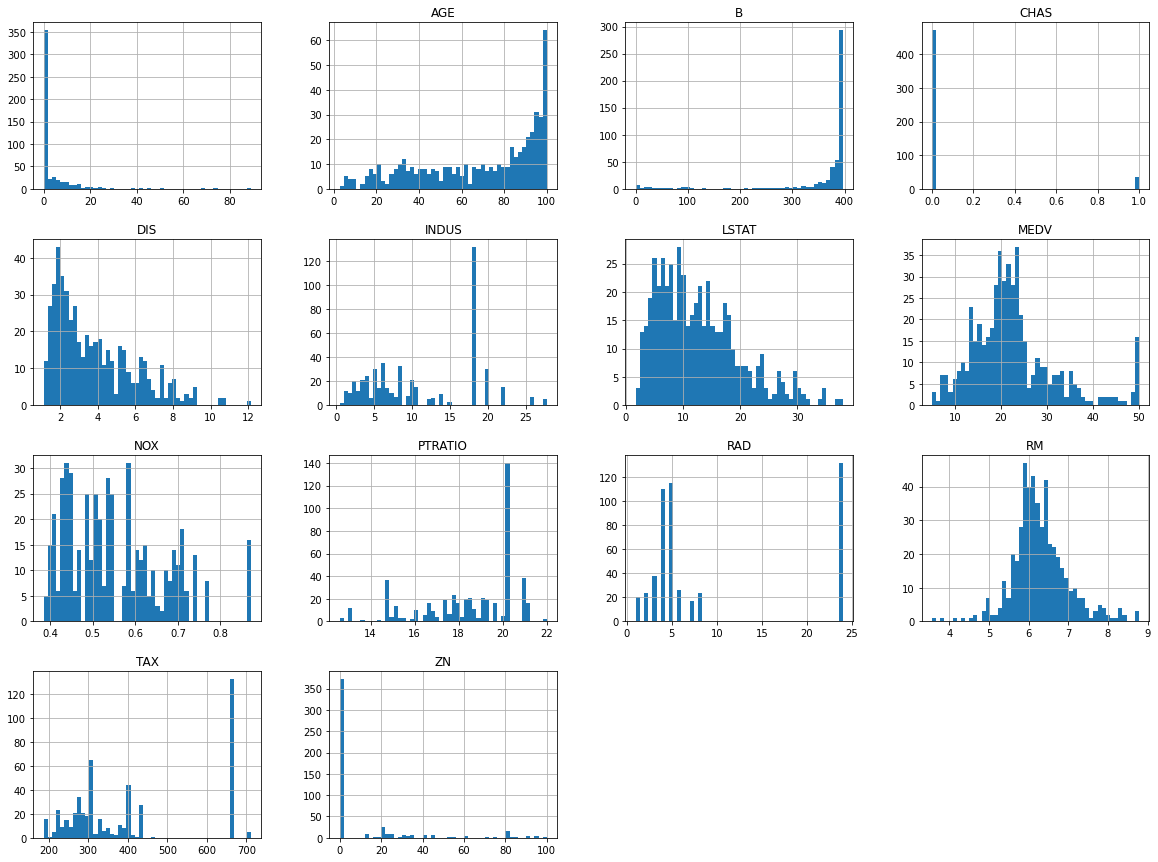

In [11]:
#for data visualisation(Histogram)
housing.hist(bins = 50, figsize = (20,15))
plt.show()

In [12]:
# #import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(32)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
#train_set, test_set = split_train_test(housing, 0.2)

In [14]:
#print(len(train_set))
#print(len(test_set))

In [15]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size= 0.2, random_state = 1)

In [16]:
print(len(train_set))
print(len(test_set))

404
102


In [17]:
train_set['CHAS'].value_counts()

0    372
1     32
Name: CHAS, dtype: int64

In [18]:
test_set['CHAS'].value_counts()

0    99
1     3
Name: CHAS, dtype: int64

In [19]:
#stratified shuffle spliting is basically a sampling considering an imp attribute in mind

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
splitted = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index,test_index in splitted.split(housing, housing['CHAS']):
    stra_train_set = housing.loc[train_index]
    stra_test_set = housing.loc[test_index]


In [21]:
stra_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [22]:
stra_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [23]:
stra_train_set.describe()

,,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000
mean,3.689425,11.960396,11.037327,0.069307,0.553279,6.290636,67.925248,3.866664,9.556931,410.012376,18.45495,359.263391,12.537921,22.474257
std,9.099733,23.954691,6.858064,0.254290,0.116643,0.684493,28.574211,2.164297,8.743334,167.953637,2.15960,87.133944,7.060730,8.936225
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.60000,0.320000,1.920000,5.000000
25%,0.079365,0.000000,5.130000,0.000000,0.448000,5.887000,42.275000,2.121275,4.000000,281.000000,17.00000,376.462500,6.867500,17.275000
50%,0.234405,0.000000,9.690000,0.000000,0.535000,6.226000,76.600000,3.272100,5.000000,330.000000,19.05000,391.905000,11.250000,21.200000
75%,3.681942,18.500000,18.100000,0.000000,0.624000,6.595000,94.150000,5.315650,24.000000,666.000000,20.20000,396.060000,16.672500,24.850000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.00000,396.900000,37.970000,50.000000


In [24]:
stra_test_set.describe()

,,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.312893,9.000000,11.530686,0.068627,0.560304,6.270900,71.148039,3.511365,9.519608,401.205882,18.457843,346.418137,13.109118,22.764706
std,6.278366,20.566723,6.889082,0.254068,0.113186,0.755483,26.373455,1.837919,8.605467,171.484280,2.196732,106.049950,7.469183,10.209398
min,0.019510,0.000000,1.380000,0.000000,0.392000,3.863000,6.500000,1.178100,1.000000,188.000000,13.000000,7.680000,1.730000,7.400000
25%,0.092845,0.000000,5.695000,0.000000,0.469750,5.869500,52.725000,1.967900,4.000000,267.000000,17.400000,370.685000,7.402500,15.400000
50%,0.340460,0.000000,9.795000,0.000000,0.538000,6.152500,79.300000,3.003800,5.000000,322.000000,19.050000,390.705000,11.990000,21.300000
75%,2.808720,0.000000,18.100000,0.000000,0.629250,6.789500,93.275000,4.691525,20.000000,666.000000,20.200000,396.900000,17.850000,27.075000
max,37.661900,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000,50.000000


In [25]:
housing = stra_train_set.copy()

In [26]:
##looking for Co-relation

In [27]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.703618
ZN         0.342024
B          0.307603
DIS        0.252648
CHAS       0.208480
RAD       -0.383573
          -0.385030
AGE       -0.397282
NOX       -0.434066
TAX       -0.463348
INDUS     -0.480671
PTRATIO   -0.483866
LSTAT     -0.725925
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000258B0B54130>,
      dtype=object)

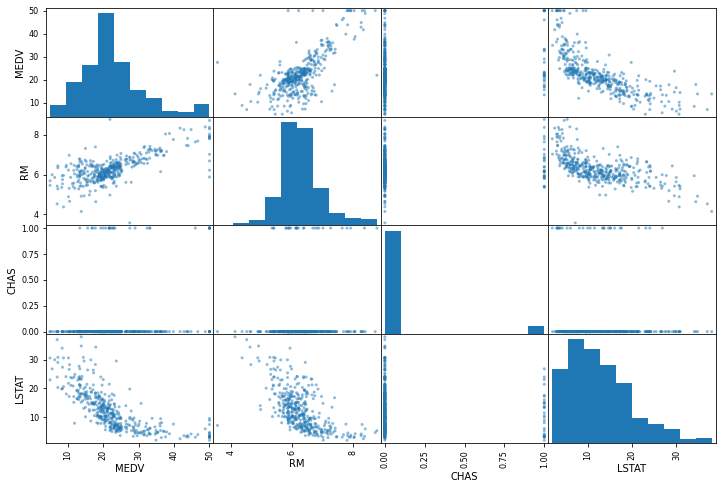

In [28]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','CHAS','LSTAT']
scatter_matrix(housing[attributes], figsize = (12,8))


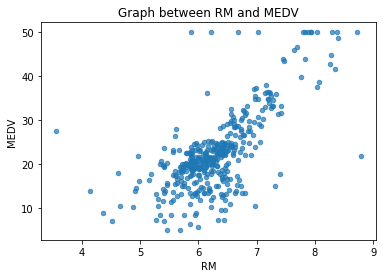

In [29]:
housing.plot(kind = "scatter", x = 'RM', y = 'MEDV', title = "Graph between RM and MEDV", alpha= 0.7)

##Attributes combination

In [30]:
housing["TaxRM"] = housing["TAX"]/ housing["RM"]

In [31]:
housing.head()

,,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TaxRM
99,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2,37.216828
54,0.01360,75.0,4.00,0,0.410,5.888,47.6,7.3197,3,469,21.1,396.90,14.80,18.9,79.653533
229,0.44178,0.0,6.20,0,0.504,6.552,21.4,3.3751,8,307,17.4,380.34,3.76,31.5,46.855922
403,24.80170,0.0,18.10,0,0.693,5.349,96.0,1.7028,24,666,20.2,396.90,19.77,8.3,124.509254
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666,20.2,391.98,17.12,13.1,102.920723


In [32]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.703618
ZN         0.342024
B          0.307603
DIS        0.252648
CHAS       0.208480
RAD       -0.383573
          -0.385030
AGE       -0.397282
NOX       -0.434066
TAX       -0.463348
INDUS     -0.480671
PTRATIO   -0.483866
TaxRM     -0.542896
LSTAT     -0.725925
Name: MEDV, dtype: float64

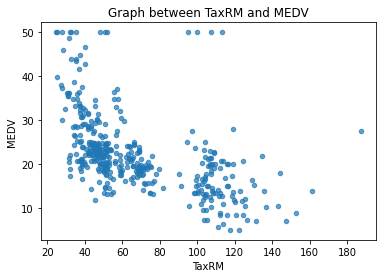

In [33]:
housing.plot(kind = "scatter", x = 'TaxRM', y = 'MEDV', title = "Graph between TaxRM and MEDV", alpha= 0.7)

In [34]:
housing = stra_test_set.drop("MEDV", axis = 1)
housing_labels = stra_test_set["MEDV"].copy()

In [35]:
#Handling Missing Attributes

In [36]:
housing.shape

(102, 13)

In [37]:
#to take care of missing attributes we have three options:
# 1. get rid of missing data points
ab = housing.dropna(subset = ["RM"])
print(ab.shape)


(100, 13)


In [38]:
# # # 2. get rid of whole attribute
# b = housing.drop("RM", axis = 1)
# print(b.shape)

In [39]:
# # 3. set the value to null value(ex mean or median)
median = housing["RM"].median()
housing["RM"].fillna(median)


109    6.229
483    5.762
161    7.489
115    5.928
218    5.951
       ...  
428    6.193
233    8.247
433    6.436
227    7.163
261    7.520
Name: RM, Length: 102, dtype: float64

In [40]:
housing.describe() #before we started imputer

,,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,100.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.312893,9.000000,11.530686,0.068627,0.560304,6.270900,71.148039,3.511365,9.519608,401.205882,18.457843,346.418137,13.109118
std,6.278366,20.566723,6.889082,0.254068,0.113186,0.755483,26.373455,1.837919,8.605467,171.484280,2.196732,106.049950,7.469183
min,0.019510,0.000000,1.380000,0.000000,0.392000,3.863000,6.500000,1.178100,1.000000,188.000000,13.000000,7.680000,1.730000
25%,0.092845,0.000000,5.695000,0.000000,0.469750,5.869500,52.725000,1.967900,4.000000,267.000000,17.400000,370.685000,7.402500
50%,0.340460,0.000000,9.795000,0.000000,0.538000,6.152500,79.300000,3.003800,5.000000,322.000000,19.050000,390.705000,11.990000
75%,2.808720,0.000000,18.100000,0.000000,0.629250,6.789500,93.275000,4.691525,20.000000,666.000000,20.200000,396.900000,17.850000
max,37.661900,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000


In [41]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "median")
imp.fit(housing)


SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [42]:
imp.statistics_ #values calculated for median for each row if a space in any column is blank or NaN it will simply place
#these medians on that place basically a place holder

array([3.40460e-01, 0.00000e+00, 9.79500e+00, 0.00000e+00, 5.38000e-01,
       6.15250e+00, 7.93000e+01, 3.00380e+00, 5.00000e+00, 3.22000e+02,
       1.90500e+01, 3.90705e+02, 1.19900e+01])

In [43]:
imp.statistics_.shape

(13,)

In [44]:
X = imp.transform(housing)

In [45]:
housing_tr = pd.DataFrame(X, columns = housing.columns)

In [46]:
housing_tr.describe()

,,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.312893,9.000000,11.530686,0.068627,0.560304,6.268578,71.148039,3.511365,9.519608,401.205882,18.457843,346.418137,13.109118
std,6.278366,20.566723,6.889082,0.254068,0.113186,0.748147,26.373455,1.837919,8.605467,171.484280,2.196732,106.049950,7.469183
min,0.019510,0.000000,1.380000,0.000000,0.392000,3.863000,6.500000,1.178100,1.000000,188.000000,13.000000,7.680000,1.730000
25%,0.092845,0.000000,5.695000,0.000000,0.469750,5.881000,52.725000,1.967900,4.000000,267.000000,17.400000,370.685000,7.402500
50%,0.340460,0.000000,9.795000,0.000000,0.538000,6.152500,79.300000,3.003800,5.000000,322.000000,19.050000,390.705000,11.990000
75%,2.808720,0.000000,18.100000,0.000000,0.629250,6.760500,93.275000,4.691525,20.000000,666.000000,20.200000,396.900000,17.850000
max,37.661900,95.000000,27.740000,1.000000,0.871000,8.704000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,34.410000


## Scikit learn design

Primarily three types of objects:
1. Estimators: It estimates some parameters based on the dataset. forEx : Imputer. it has a fit() and transform() method. fit method fits the data and calculate internal parameters.

2. Transformers: transform method takes input and produce output based on the learning from fit method.it has a convinience function called as fit_transform which basically fits and then transform the data.

3. Predictors: Linearregression model is an example of predictors. fit() and predict() are two basic functions and it have score() to evaluate the predictions.

## feature scaling

Generally there are two types of feature scaling:
 1. min-max Scaling:
     (value-min)/(max-min)
     sklean provides a class for this known as MinMaxScaler(value in between 0-1).
 2. Standardization:
     (value-mean)/std
     sklearn provide a class for this known as standardScaler.

### creating a pipeline

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer' , SimpleImputer(strategy= "median")),
    # we can add as much functions in pipline for execution
    #......
    ('std_scaler', StandardScaler()),
])

In [48]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [49]:
housing_num_tr

array([[-0.48807626, -0.4397611 , -0.43334603, ...,  1.1172128 ,
         0.424641  ,  0.32840758],
       [-0.07915358, -0.4397611 ,  0.95829238, ...,  0.796984  ,
         0.44065559, -0.3618063 ],
       [-0.29604306, -0.4397611 ,  1.17418596, ..., -1.71909942,
         0.26544278, -1.530999  ],
       ...,
       [ 0.36305275, -0.4397611 ,  0.95829238, ...,  0.796984  ,
        -2.33327866,  0.41855247],
       [-0.46426678, -0.4397611 , -0.77760878, ..., -0.4839312 ,
         0.24317398, -0.90805743],
       [-0.44478063,  0.53748579, -1.1029079 , ..., -2.49679793,
         0.3975394 , -0.78696728]])

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()## for LR score is .97 and RootmeanSquareError is 1.67 the best among all
#model = DecisionTreeRegressor() ## for DTR score is 1 and RootmeanSquareError is 0 i.e overfitting
#model = LinearRegression() ## for LR score is .80 and RootmeanSquareError is 4.46
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [51]:
# m =model.coef_[0:14]
# m

In [52]:
# c = model.intercept_
# c

In [53]:
##now fun starts

In [54]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [55]:
prep_data = my_pipeline.transform(some_data)

In [56]:
model.predict(prep_data)

array([19.15 , 21.724, 47.154, 18.601, 20.296])

In [57]:

list(some_labels)

[19.4, 21.8, 50.0, 18.3, 21.5]

In [58]:
score= model.score(housing_num_tr,housing_labels)
score

0.9696592216164834

In [59]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
mse = np.sqrt(mse)
mse

1.7695958965975531

## using better evaluation technique CROSS VALIDATION

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([3.63285292, 4.29106116, 4.02036302, 2.63100215, 3.90314897,
       2.62750762, 3.53497737, 9.80959249, 4.33265842, 5.66584026])

In [61]:
def print_scores(rmse_scores):
    print("Scores", scores)
    print("mean", scores.mean())
    print("Std", scores.std())

In [62]:
print_scores(rmse_scores)

Scores [-13.19762036 -18.41320591 -16.1633188   -6.9221723  -15.2345719
  -6.9037963  -12.496065   -96.2281049  -18.771929   -32.1017459 ]
mean -23.64325303727274
Std 25.121744252572356


Saving the model

In [63]:
from joblib import dump,load
dump(model,'realEstate.joblib')

['realEstate.joblib']

Testing the model

In [64]:
x_test = stra_test_set.drop("MEDV", axis = 1)
y_test = stra_test_set["MEDV"].copy()
x_test_prep = my_pipeline.transform(x_test)
final_pred = model.predict(x_test_prep)
final_mse = mean_squared_error(y_test, final_pred)
final_rmse = np.sqrt(final_pred)
final_rmse

array([4.3760713 , 4.6609012 , 6.86687702, 4.31288766, 4.50510821,
       4.62103884, 4.81746821, 2.93462093, 5.67388756, 4.27071423,
       4.84344918, 5.9375921 , 4.41282223, 3.62891168, 5.79145923,
       3.21169737, 5.69499781, 5.81584044, 4.30069762, 4.59923907,
       3.61192469, 3.98597541, 4.93183536, 4.41633332, 4.22776537,
       4.78152695, 4.51752144, 4.95439199, 4.12868018, 4.13098051,
       4.68849656, 5.22943592, 4.51043235, 5.53958482, 3.90998721,
       4.2763302 , 4.57515027, 4.0264128 , 6.47410225, 4.74141329,
       4.46799731, 3.69377855, 5.38739269, 4.05783193, 3.8055223 ,
       4.04029702, 4.90326422, 5.36507223, 4.90764709, 6.1464624 ,
       3.46078026, 4.13182768, 4.97413309, 3.59402282, 3.0367746 ,
       4.3087121 , 3.86251214, 4.48865236, 4.88170052, 3.72276779,
       4.4830793 , 4.37275657, 6.04532878, 5.91405107, 3.08658387,
       3.42111093, 4.91548573, 4.80894999, 5.14606646, 5.58766499,
       3.21589801, 4.57908288, 6.24747949, 6.19709609, 4.63335

In [65]:
#print(final_pred,list(y_test))

In [66]:
prep_data[0]

array([-0.48807626, -0.4397611 , -0.43334603, -0.27144836, -0.35784411,
       -0.05316316,  0.76406307, -0.52833486, -0.52779551, -0.10083053,
        1.1172128 ,  0.424641  ,  0.32840758])

Using the model

In [67]:
from joblib import dump,load 
model = load('realEstate.joblib')
import numpy as np
input = np.array([[-0.48807626, -0.4397611 , -0.43334603, -0.27144836, -0.35784411,
       -0.05316316,  0.376406307, -0.52833486, -0.52779551, -0.10083053,
        1.1172128 ,  0.424641  ,  0.32840758]])
model.predict(input)

array([19.62])